In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("madaline.csv")
df

,x1,x2,y
0,0.459694,-0.470583,0
1,0.797385,-0.343030,0
2,0.235270,0.961296,0
3,0.765453,-0.177644,0
4,-0.335577,-0.313893,0
...,...,...,...
195,0.744066,-1.206548,1
196,-0.457547,1.286227,1
197,-1.020000,-0.783926,1
198,1.363429,-0.800250,1


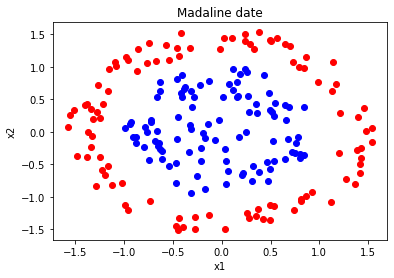

In [3]:
x1_df = df['x1']
x2_df = df['x2']
y_df = df['y']
x1_class1=[]
x2_class1=[]
x1_class2=[]
x2_class2=[]
for i in range(len(x1_df)):
    if(y_df[i]==1):
        x1_class1.append(x1_df[i])
        x2_class1.append(x2_df[i])
    elif(y_df[i]==0):
        x1_class2.append(x1_df[i])
        x2_class2.append(x2_df[i])
plt.scatter(x1_class1, x2_class1,c= "red")
plt.scatter(x1_class2, x2_class2, c= "blue")
plt.title('Madaline date')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
s_list = []
t_list = []
for i in range(len(x1_df)):
    s_list.append([x1_df[i],x2_df[i]])
for i in range(len(y_df)):
    if(y_df[i] == 1):
        t_list.append(1)
    else:
        t_list.append(-1)
s = array(s_list)
t = array(t_list)

w1:  [0.001710328193996866, 0.0012218495959998388]  b1: 0.0020000000000008743
w2:  [-0.0005574301319985732, -0.0009906209679994876]  b2: 0.0019999999999989037
w3:  [0.0008779552940002078, -0.00040170683199978454]  b3: 0.0020000000000004303
w4:  [0.0006665177019999435, 0.0010238564240008497]  b4: 0.001999999999999348
Epochs needed: :  499


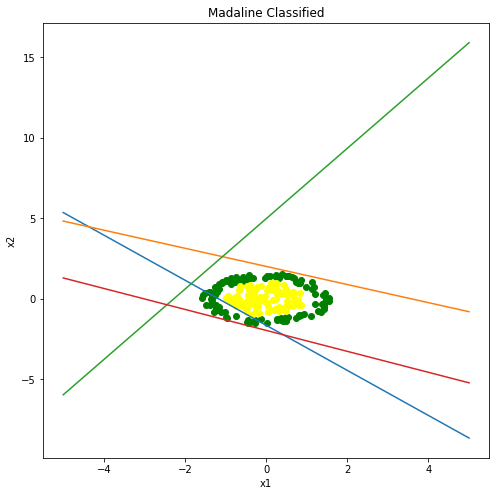

In [35]:
b1 = -1
b2 = 1.5
b3 = -0.5
b4 = 0.75

w1 = [-0.8,0.3]
w11 = w1[0]
w12 = w1[1]
w2 =  [1,0.425]
w21 = w2[0]
w22 = w2[1]
w3 =  [0.25,0.5]
w31 = w3[0]
w32 = w3[1]
w4 =  [0.5,-0.5]
w41 = w4[0]
w42 = w4[1]

alpha_1 = 0.001
alpha_2 = 0.001
alpha_3 = 0.001
alpha_4 = 0.001

# v1,v2,v3,v4,b5 = 0.25,0.25,0.25,0.25,(3*0.25) #Output neuron: 'OR' over hidden layers
v1,v2,v3,v4,b5 = 0.25,0.25,0.25,0.25,0 #Output neuron: 'AND' over hidden layers

for epoch in range(500):
    for i in range(len(s)):
        net1 = dot(s[i],w1) +b1
        net2 = dot(s[i],w2)+b2
        net3 = dot(s[i],w3)+b3
        net4 = dot(s[i],w4)+b4
        if(net1>=0): 
            z1= 1
        else: 
            z1= -1
        if(net2>=0):
            z2= 1
        else: 
            z2= -1
        if(net3>=0):
            z3= 1
        else: 
            z3= -1
        if(net4>=0): 
            z4= 1
        else: 
            z4= -1
        y_in = v1*z1+v2*z2+v3*z3+v4*z4+b5 #OR
        if(y_in >= 0): 
            y=1
        else: 
            y=-1
        if(y != t[i]):
            if(t[i] == 1):
                w11 = w11 + alpha_1*(1-z1)*s[i,0]
                w12 = w12 + alpha_1*(1-z1)*s[i,1]

                w21 = w21 + alpha_2*(1-z2)*s[i,0]
                w22 = w22 + alpha_2*(1-z2)*s[i,1]
                w31 = w31 + alpha_3*(1-z3)*s[i,0]
                w32 = w32 + alpha_3*(1-z3)*s[i,1]
                w41 = w41 + alpha_4*(1-z4)*s[i,0]
                w42 = w42 + alpha_4*(1-z4)*s[i,1]
                b1 = b1 + alpha_1*(1-z1)
                b2 = b2 + alpha_2*(1-z2)
                b3 = b3 + alpha_3*(1-z3)
                b4 = b4 + alpha_4*(1-z4)
            if (t[i] == -1):
                w11 = w11 + alpha_1*(-1-z1)*s[i,0]
                w12 = w12 + alpha_1*(-1-z1)*s[i,1]
                w21 = w21 + alpha_2*(-1-z2)*s[i,0]
                w22 = w22 + alpha_2*(-1-z2)*s[i,1]
                w31 = w31 + alpha_3*(-1-z3)*s[i,0]
                w32 = w32 + alpha_3*(-1-z3)*s[i,1]
                w41 = w41 + alpha_4*(-1-z4)*s[i,0]
                w42 = w42 + alpha_4*(-1-z4)*s[i,1]
                b1 = b1 + alpha_1*(-1-z1)
                b2 = b2 + alpha_2*(-1-z2)
                b3 = b3 + alpha_3*(-1-z3)
                b4 = b4 + alpha_4*(-1-z4)
        w1 = [w11,w12]
        w2 = [w21,w22]
        w3 = [w31,w32]
        w4 = [w41,w42]
        
print("w1: ", w1," b1:",b1)
print("w2: ", w2," b2:",b2)
print("w3: ", w3," b3:",b3)
print("w4: ", w4," b4:",b4)
plt.figure(figsize=(8, 8))

print("Epochs needed: : ", epoch)
plt.scatter(x1_class1, x2_class1, c = "green")
plt.scatter(x1_class2, x2_class2, c  ="yellow")
x_axis = linspace(-5,5, 1000)
plt.plot(x_axis, (-1*(1/w1[1]))*(w1[0]*x_axis+b1))
plt.plot(x_axis, (-1*(1/w2[1]))*(w2[0]*x_axis+b2))
plt.plot(x_axis, (-1*(1/w3[1]))*(w3[0]*x_axis+b3))
plt.plot(x_axis, (-1*(1/w4[1]))*(w4[0]*x_axis+b4))
plt.title('Madaline Classified')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

w1 =  [4.373689203622416, 3.517670726812304]
w2 =   [-1.1254472480024293, 4.350114028220404]
w3 =   [-0.0002577006795498049, 0.0003771642864503755]
w4 =   [-0.2531792051553622, -0.29084354671930407]
w5 =   [-0.8350556497512165, -0.6565168915951944]
w6 =   [-0.6131828261693624, -0.5607204925953243]
 b1 = [-5.36295325]
 b2 =  [-4.18613098]
 b3 =  [0.00575768]
 b4 =  [-0.01818916]
 b5 =  [1.56457312]
 b6 =  [0.73663506]


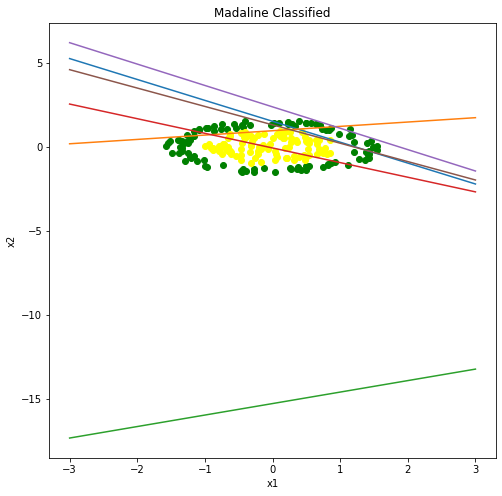

In [36]:

b1 = random.rand(1)*-9
b2 = random.rand(1)*-9
b3 = random.rand(1)*9
b4 = random.rand(1)*9
b5 = random.rand(1)*9
b6 = random.rand(1)*9

w1 = random.rand(1)*[5, 5]
w11 = w1[0]
w12 = w1[1]
w2 = random.rand(1)*[-5, 5]
w21 = w2[0]
w22 = w2[1]
w3 = random.rand(1)*[-5, -5]
w31 = w3[0]
w32 = w3[1]
w4 = random.rand(1)*[-5, -5]
w41 = w4[0]
w42 = w4[1]
w5 = random.rand(1)*[-5, -5]
w51 = w5[0]
w52 = w5[1]
w6 = random.rand(1)*[-5, -5]
w61 = w6[0]
w62 = w6[1]

alpha_1 = 0.001
alpha_2 = 0.001
alpha_3 = 0.001
alpha_4 = 0.001
alpha_5 = 0.001
alpha_6 = 0.001

# v1,v2,v3,v4,v5,v6,b7 = (1/6),(1/6),(1/6),(1/6),(1/6),(1/6),(5*(1/6)) #Output neuron: 'OR' over hidden layers
v1,v2,v3,v4,v5,v6,b7 = (1/6),(1/6),(1/6),(1/6),(1/6),(1/6),0 #Output neuron: 'AND' over hidden layer

for epoch in range(400):
    for i in range(len(s)):
        net1 = dot(s[i],w1)+b1
        net2 = dot(s[i],w2)+b2
        net3 = dot(s[i],w3)+b3
        net4 = dot(s[i],w4)+b4
        net5 = dot(s[i],w5)+b5
        net6 = dot(s[i],w6)+b6
        if(net1>=0): 
            z1= 1
        else: 
            z1= -1
        if(net2>=0):
            z2= 1
        else: 
            z2= -1
        if(net3>=0):
            z3= 1
        else: 
            z3= -1
        if(net4>=0): 
            z4= 1
        else: 
            z4= -1
        if(net5>=0): 
            z5= 1
        else: 
            z5= -1
        if(net6>=0): 
            z6= 1
        else: 
            z6= -1
        y_in = v1*z1+v2*z2+v3*z3+v4*z4+v5*z5+v6*z6+b7 
        if(y_in >= 0): 
            y=1
        else: 
            y=-1
        if(y != t[i]):
            if (t[i] == 1):
                w11 = w11 + alpha_1*(1-z1)*s[i,0]
                w12 = w12 + alpha_1*(1-z1)*s[i,1]
                w21 = w21 + alpha_2*(1-z2)*s[i,0]
                w22 = w22 + alpha_2*(1-z2)*s[i,1]
                w31 = w31 + alpha_3*(1-z3)*s[i,0]
                w32 = w32 + alpha_3*(1-z3)*s[i,1]
                w41 = w41 + alpha_4*(1-z4)*s[i,0]
                w42 = w42 + alpha_4*(1-z4)*s[i,1]
                w51 = w51 + alpha_5*(1-z5)*s[i,0]
                w52 = w52 + alpha_5*(1-z5)*s[i,1]
                w61 = w61 + alpha_6*(1-z6)*s[i,0]
                w62 = w62 + alpha_6*(1-z6)*s[i,1]
                b1 = b1 + alpha_1*(1-z1)
                b2 = b2 + alpha_2*(1-z2)
                b3 = b3 + alpha_3*(1-z3)
                b4 = b4 + alpha_4*(1-z4)
                b5 = b5 + alpha_5*(1-z5)
                b6 = b6 + alpha_6*(1-z6)
            if (t[i] == -1):
                w11 = w11 + alpha_1*(-1-z1)*s[i,0]
                w12 = w12 + alpha_1*(-1-z1)*s[i,1]
                w21 = w21 + alpha_2*(-1-z2)*s[i,0]
                w22 = w22 + alpha_2*(-1-z2)*s[i,1]
                w31 = w31 + alpha_3*(-1-z3)*s[i,0]
                w32 = w32 + alpha_3*(-1-z3)*s[i,1]
                w41 = w41 + alpha_4*(-1-z4)*s[i,0]
                w42 = w42 + alpha_4*(-1-z4)*s[i,1]
                w51 = w51 + alpha_5*(-1-z5)*s[i,0]
                w52 = w52 + alpha_5*(-1-z5)*s[i,1]
                w61 = w61 + alpha_6*(-1-z6)*s[i,0]
                w62 = w62 + alpha_6*(-1-z6)*s[i,1]
                b1 = b1 + alpha_1*(-1-z1)
                b2 = b2 + alpha_2*(-1-z2)
                b3 = b3 + alpha_3*(-1-z3)
                b4 = b4 + alpha_4*(-1-z4)
                b5 = b5 + alpha_5*(-1-z5)
                b6 = b6 + alpha_6*(-1-z6)
        w1 = [w11,w12]
        w2 = [w21,w22]
        w3 = [w31,w32]
        w4 = [w41,w42]
        w5 = [w51,w52]
        w6 = [w61,w62]


print("w1 = ", w1)
print("w2 =  ", w2)
print("w3 =  ", w3)
print("w4 =  ", w4)
print("w5 =  ", w5)
print("w6 =  ", w6)
print(" b1 =",b1)
print(" b2 = ",b2)
print(" b3 = ",b3)
print(" b4 = ",b4)
print(" b5 = ",b5)
print(" b6 = ",b6)

plt.figure(figsize=(8, 8))

plt.scatter(x1_class1, x2_class1,color= "green")
plt.scatter(x1_class2, x2_class2, color= "yellow")
x_axis = linspace(-3,3, 1000)
plt.plot(x_axis, (-1*(1/w1[1]))*(w1[0]*x_axis+b1))
plt.plot(x_axis, (-1*(1/w2[1]))*(w2[0]*x_axis+b2))
plt.plot(x_axis, (-1*(1/w3[1]))*(w3[0]*x_axis+b3))
plt.plot(x_axis, (-1*(1/w4[1]))*(w4[0]*x_axis+b4))
plt.plot(x_axis, (-1*(1/w5[1]))*(w5[0]*x_axis+b5))
plt.plot(x_axis, (-1*(1/w6[1]))*(w6[0]*x_axis+b6))

plt.title('Madaline Classified')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

w1:  [1.9963974902822617, 2.1878421698803026]
 b1: [-3.60278591]
w2:  [0.35371007833910495, 1.3346466690969188]
 b2: [-1.37686111]
w3:  [-0.4836889405315051, -0.35066773858950717]
 b3: [0.73116357]
w4:  [-1.1952349067924972, -1.0331249466985057]
 b4: [2.04634919]
w5:  [-0.0011153221612215825, -0.0005378900952217104]
 b5: [0.00401561]
w6:  [-0.00151093440826076, 0.00036238518773087057]
 b6: [0.00268609]
w7:  [-0.004880734205633919, -0.3859391412156409]
 b7: [-0.58691376]
w8:  [0.26697981621864203, -0.06796351413335819]
 b8: [-0.23826352]


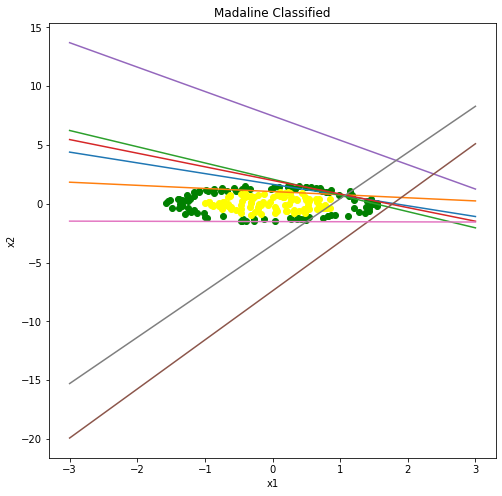

In [39]:

b1 = random.rand(1)*-10
b2 = random.rand(1)*-10
b3 = random.rand(1)*10
b4 = random.rand(1)*10
b5 = random.rand(1)*10
b6 = random.rand(1)*10
b7 = random.rand(1)*10
b8 = random.rand(1)*10

w1 = random.rand(1)*[5, 5]
w11 = w1[0]
w12 = w1[1]
w2 = random.rand(1)*[-5, 5]
w21 = w2[0]
w22 = w2[1]
w3 = random.rand(1)*[-5, -5]
w31 = w3[0]
w32 = w3[1]
w4 = random.rand(1)*[-5, -5]
w41 = w4[0]
w42 = w4[1]
w5 = random.rand(1)*[-5, -5]
w51 = w5[0]
w52 = w5[1]
w6 = random.rand(1)*[-5, -5]
w61 = w6[0]
w62 = w6[1]
w7 = random.rand(1)*[-5, -5]
w71 = w7[0]
w72 = w7[1]
w8 = random.rand(1)*[-5, -5]
w81 = w8[0]
w82 = w8[1]

alpha_1 = 0.001
alpha_2 = 0.001
alpha_3 = 0.001
alpha_4 = 0.001
alpha_5 = 0.001
alpha_6 = 0.001
alpha_7 = 0.001
alpha_8 = 0.001
# v1,v2,v3,v4,v5,v6,v7,v8,b9 = (1/8),(1/8),(1/8),(1/8),(1/8),(1/8),(1/8),(1/8),(7*(1/8)) #Output neuron: 'OR' over hidden layers
v1,v2,v3,v4,v5,v6,v7,v8,b9 = (1/8),(1/8),(1/8),(1/8),(1/8),(1/8),(1/8),(1/8),0 #Output neuron: 'AND' over hidden layer

for epoch in range(250):
    for i in range(len(s)):
        net1 = dot(s[i],w1)+b1
        net2 = dot(s[i],w2)+b2
        net3 = dot(s[i],w3)+b3
        net4 = dot(s[i],w4)+b4
        net5 = dot(s[i],w5)+b5
        net6 = dot(s[i],w6)+b6
        net7 = dot(s[i],w7)+b7
        net8 = dot(s[i],w8)+b8
        if(net1>=0): 
            z1= 1
        else: 
            z1= -1
        if(net2>=0):
            z2= 1
        else: 
            z2= -1
        if(net3>=0):
            z3= 1
        else: 
            z3= -1
        if(net4>=0): 
            z4= 1
        else: 
            z4= -1
        if(net5>=0): 
            z5= 1
        else: 
            z5= -1
        if(net6>=0): 
            z6= 1
        else: 
            z6= -1
        if(net7>=0): 
            z7= 1
        else: 
            z7= -1
        if(net8>=0): 
            z8= 1
        else: 
            z8= -1
        y_in = v1*z1+v2*z2+v3*z3+v4*z4+v5*z5+v6*z6+v7*z7+v8*z8+b9 
        if(y_in >= 0): 
            y=1
        else: 
            y=-1
        if(y != t[i]):
            if (t[i] == 1):
                w11 = w11 + alpha_1*(1-z1)*s[i,0]
                w12 = w12 + alpha_1*(1-z1)*s[i,1]
                w21 = w21 + alpha_2*(1-z2)*s[i,0]
                w22 = w22 + alpha_2*(1-z2)*s[i,1]
                w31 = w31 + alpha_3*(1-z3)*s[i,0]
                w32 = w32 + alpha_3*(1-z3)*s[i,1]
                w41 = w41 + alpha_4*(1-z4)*s[i,0]
                w42 = w42 + alpha_4*(1-z4)*s[i,1]
                w51 = w51 + alpha_5*(1-z5)*s[i,0]
                w52 = w52 + alpha_5*(1-z5)*s[i,1]
                w61 = w61 + alpha_6*(1-z6)*s[i,0]
                w62 = w62 + alpha_6*(1-z6)*s[i,1]
                w71 = w71 + alpha_7*(1-z7)*s[i,0]
                w72 = w72 + alpha_7*(1-z7)*s[i,1]
                w81 = w81 + alpha_8*(1-z8)*s[i,0]
                w82 = w82 + alpha_8*(1-z8)*s[i,1]

                b1 = b1 + alpha_1*(1-z1)
                b2 = b2 + alpha_2*(1-z2)
                b3 = b3 + alpha_3*(1-z3)
                b4 = b4 + alpha_4*(1-z4)
                b5 = b5 + alpha_5*(1-z5)
                b6 = b6 + alpha_6*(1-z6)
            if (t[i] == -1):
                w11 = w11 + alpha_1*(-1-z1)*s[i,0]
                w12 = w12 + alpha_1*(-1-z1)*s[i,1]
                w21 = w21 + alpha_2*(-1-z2)*s[i,0]
                w22 = w22 + alpha_2*(-1-z2)*s[i,1]
                w31 = w31 + alpha_3*(-1-z3)*s[i,0]
                w32 = w32 + alpha_3*(-1-z3)*s[i,1]
                w41 = w41 + alpha_4*(-1-z4)*s[i,0]
                w42 = w42 + alpha_4*(-1-z4)*s[i,1]
                w51 = w51 + alpha_5*(-1-z5)*s[i,0]
                w52 = w52 + alpha_5*(-1-z5)*s[i,1]
                w61 = w61 + alpha_6*(-1-z6)*s[i,0]
                w62 = w62 + alpha_6*(-1-z6)*s[i,1]
                w71 = w71 + alpha_7*(-1-z7)*s[i,0]
                w72 = w72 + alpha_7*(-1-z7)*s[i,1]
                w81 = w81 + alpha_8*(-1-z8)*s[i,0]
                w82 = w82 + alpha_8*(-1-z8)*s[i,1]

                b1 = b1 + alpha_1*(-1-z1)
                b2 = b2 + alpha_2*(-1-z2)
                b3 = b3 + alpha_3*(-1-z3)
                b4 = b4 + alpha_4*(-1-z4)
                b5 = b5 + alpha_5*(-1-z5)
                b6 = b6 + alpha_6*(-1-z6)
                b7 = b7 + alpha_7*(-1-z7)
                b8 = b8 + alpha_8*(-1-z8)

        w1 = [w11,w12]
        w2 = [w21,w22]
        w3 = [w31,w32]
        w4 = [w41,w42]
        w5 = [w51,w52]
        w6 = [w61,w62]
        w7 = [w71,w72]
        w8 = [w81,w82]
        

print("w1: ", w1)
print(" b1:",b1)
print("w2: ", w2)
print(" b2:",b2)
print("w3: ", w3)
print(" b3:",b3)
print("w4: ", w4)
print(" b4:",b4)
print("w5: ", w5)
print(" b5:",b5)
print("w6: ", w6)
print(" b6:",b6)
print("w7: ", w7)
print(" b7:",b7)
print("w8: ", w8)
print(" b8:",b8)
plt.figure(figsize=(8, 8))

plt.scatter(x1_class1, x2_class1,color= "green")
plt.scatter(x1_class2, x2_class2,  color= "yellow")
x_axis = linspace(-3,3, 1000)
plt.plot(x_axis, (-1*(1/w1[1]))*(w1[0]*x_axis+b1))
plt.plot(x_axis, (-1*(1/w2[1]))*(w2[0]*x_axis+b2))
plt.plot(x_axis, (-1*(1/w3[1]))*(w3[0]*x_axis+b3))
plt.plot(x_axis, (-1*(1/w4[1]))*(w4[0]*x_axis+b4))
plt.plot(x_axis, (-1*(1/w5[1]))*(w5[0]*x_axis+b5))
plt.plot(x_axis, (-1*(1/w6[1]))*(w6[0]*x_axis+b6))
plt.plot(x_axis, (-1*(1/w7[1]))*(w7[0]*x_axis+b7))
plt.plot(x_axis, (-1*(1/w8[1]))*(w8[0]*x_axis+b8))

plt.title('Madaline Classified')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()